In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras import utils, optimizers, regularizers

Делим наш датасет на обучающую и тестовую выборку

In [9]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [10]:
print('train_images: ', train_images.shape)
print('test_images: ', test_images.shape)
print('train_labels: ', train_labels.shape)
print('test_labels: ', test_labels.shape)

train_images:  (50000, 32, 32, 3)
test_images:  (10000, 32, 32, 3)
train_labels:  (50000, 1)
test_labels:  (10000, 1)


Нормализация данных

In [11]:
train_labels = utils.to_categorical(train_labels, 100)
test_labels = utils.to_categorical(test_labels, 100)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255
test_images = test_images / 255

создание модели нейронной сети

In [12]:
dropP = 0.5

model = Sequential()

model.add(Conv2D(128,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropP))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropP))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropP))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.L2(1e-4)))
model.add(Activation('relu'))
model.add(Dropout(dropP))
model.add(BatchNormalization())
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 32, 32, 128)      

Компиляция модели

In [13]:
model.compile(optimizer=optimizers.Adagrad(learning_rate=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Обучение модели

In [14]:
epochs = 50
batch_size = 64

hist = model.fit(train_images, train_labels, batch_size=batch_size, validation_data=(test_images, test_labels),
                 epochs=epochs)

Epoch 1/50
782/782 [==============================] - 20s 25ms/step - loss: 4.1879 - accuracy: 0.0842 - val_loss: 3.9240 - val_accuracy: 0.1109
Epoch 2/50
782/782 [==============================] - 19s 24ms/step - loss: 3.5460 - accuracy: 0.1709 - val_loss: 3.3836 - val_accuracy: 0.2105
Epoch 3/50
782/782 [==============================] - 19s 25ms/step - loss: 3.2158 - accuracy: 0.2302 - val_loss: 3.1788 - val_accuracy: 0.2394
Epoch 4/50
782/782 [==============================] - 19s 25ms/step - loss: 2.9413 - accuracy: 0.2816 - val_loss: 3.4710 - val_accuracy: 0.2147
Epoch 5/50
782/782 [==============================] - 19s 25ms/step - loss: 2.7426 - accuracy: 0.3218 - val_loss: 3.0007 - val_accuracy: 0.2866
Epoch 6/50
782/782 [==============================] - 20s 25ms/step - loss: 2.5872 - accuracy: 0.3536 - val_loss: 2.3897 - val_accuracy: 0.4041
Epoch 7/50
782/782 [==============================] - 20s 25ms/step - loss: 2.4542 - accuracy: 0.3842 - val_loss: 2.4447 - val_accuracy:

Проверка точности предсказания

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 1.7439 - accuracy: 0.5981


Графики

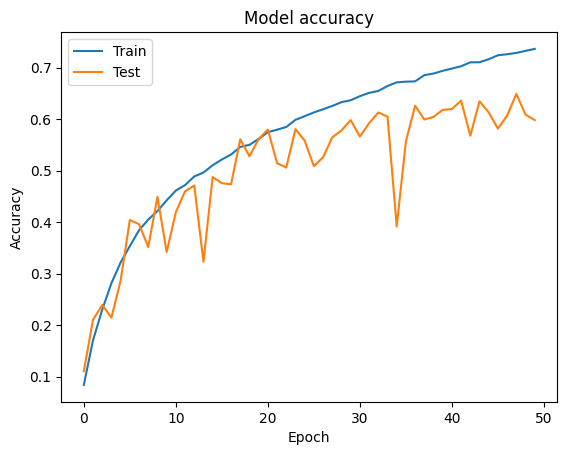

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

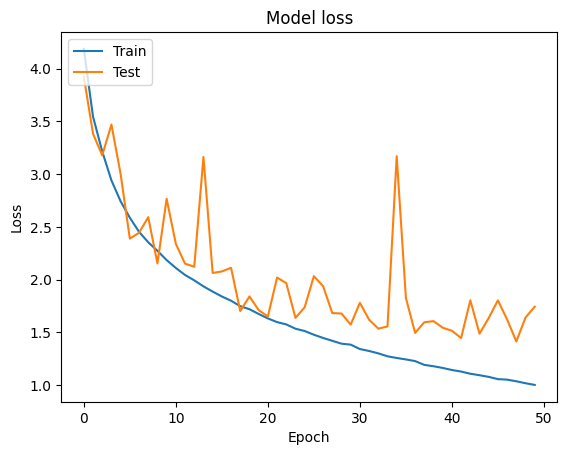

None


In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
print(plt.show())